In [28]:
"""
This Jupyter notebook was used to perform some web-scraping of recipes from an open online recipe collection 
Source-copy-right-> https://www.kochrezepte.de
This web-scraping was used in order to get an impression about which recipe ingredients are used the most frequently
The relative importance of food recipe items was assessed by Count statistics
1.)For this purpose https-urllib requests were used to get the Web data of free recipes
2.) A nested url search was performed based on the starting page https://www.kochrezepte.de/rezepte/
3.) The xml trees were returned from the web-sites of individual pages containing recipe information
4.) the web-page information was extracted by parsing and regex matching
5.) The ingredients were enlisted and the statistics were visualized
6.) These statistics were used to priorize the search for CO2 footprint information of the most relevant products 
first.
"""

In [ ]:
import urllib.request
import json
import requests
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
__author__: 'Christoph Hiemenz'
__version__: 0.01
__status__: 'exploration'
__contact__: 'christoph.hiemenz@web.de'

In [3]:
def return_ingredient_list(recipe_in):
    match_span = re.search('ingredient-.*post type-post"',str(recipe_in)).span()
    ingredients = [i[1:].strip() for i in str(tmp_refs[0])[match_span[0]:match_span[1]].split('ingredient')][1:]
    ingredients_clean = [z.split(' ')[0].split('-') for z in ingredients]
    return ingredients_clean

In [4]:
response = requests.get('https://www.kochrezepte.de/rezept/')

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()
samples = soup.find_all("a")
samples
data = {}
for a in samples:
    if a.string:
        title = a.string.strip()
        data[title] = a.attrs['href']

In [6]:
exclude_list = ['Anbau','Rezept eingeben',
                'Home','Diät-Tipps','Food around the world','Top news','Abendessen','Newsletter',
                'Rezept eingeben','Rezept eingeben','Rezepte','Haben Sie Ihr Passwort vergessen?',
                'JETZT REGISTRIEREN','DATENSCHUTZ','IMPRESSUM','AGB','Jetzt kontakt aufnehmen',
                'Mehr infos hier']

In [7]:
ctr = -1
collect_links = []
for key, val in data.items():
    ctr+=1
    if re.search('https',str(val)) and key not in exclude_list:
        print(val)
        print(key)
        try:
            tmp_get = (key, val, requests.get(val).content)
            soup = BeautifulSoup(tmp_get[2], 'html.parser')
            soup.prettify()
            samples_tmp = soup.find_all("a")
            only_recipe_links = [str(i)[re.search(r'www.kochrezepte.de/rezepte/.*/"',str(i)).span()[0]:re.search(r'www.kochrezepte.de/rezepte/.*/"',str(i)).span()[1]] for i in samples_tmp if re.search(r'www.kochrezepte.de/rezepte/.*/',str(i))]
            collect_links = collect_links + only_recipe_links 
        except:
            print('no_access')

https://www.kochrezepte.de/magazin/weltnudeltag-die-besten-nudel-rezepte-und-fakten/
Weltnudeltag – Die besten Nudel Rezepte und Fakten
https://www.kochrezepte.de/magazin/paprika-rezepte/
Knackig bunt – Paprika Rezepte und Fakten
https://www.kochrezepte.de/magazin/fruchtige-ernte-trauben-rezepte-und-fakten/
Fruchtige Ernte – Trauben Rezepte und Fakten
https://www.kochrezepte.de/category/magazin/artikel/
Artikel
https://www.kochrezepte.de/category/chefkoche/
Chefköche
https://www.kochrezepte.de/category/menue-kategorien/diaet-gesundheit/
Diät & Gesundheit
https://www.kochrezepte.de/category/menue-kategorien/food-trends-menue-kategorien/
Food Trends
https://www.kochrezepte.de/category/magazin/lexikon/
Lexikon
https://www.kochrezepte.de/category/side-news/
Side news
https://www.kochrezepte.de/recipe_tag/backpulver/
Backpulver
https://www.kochrezepte.de/recipe_tag/basilikum/
Basilikum
https://www.kochrezepte.de/recipe_tag/butter/
Butter
https://www.kochrezepte.de/recipe_tag/butterschmalz/


In [9]:
unique_list = list(set(collect_links))

In [10]:
unique_list

['www.kochrezepte.de/rezepte/herzhafte-kaese-tarte/"',
 'www.kochrezepte.de/rezepte/spanferkelkeule/"',
 'www.kochrezepte.de/rezepte/gedeckte-apfeltorte/"',
 'www.kochrezepte.de/rezepte/leckerer-fruechte-pie-fuer-gaeste/"',
 'www.kochrezepte.de/rezepte/pumpkin-spice-latte/"',
 'www.kochrezepte.de/rezepte/weihnachtlicher-lebkuchenpudding-mit-beerenfruechten/"',
 'www.kochrezepte.de/rezepte/fettuccine-alfredo-mit-garnelen/"',
 'www.kochrezepte.de/rezepte/planters-punch/"',
 'www.kochrezepte.de/rezepte/gnocci-spinaci/"',
 'www.kochrezepte.de/rezepte/russischer-kartoffelsalat-in-20-minuten/"',
 'www.kochrezepte.de/rezepte/gazpacho-to-go/"',
 'www.kochrezepte.de/rezepte/kalter-hund-13/"',
 'www.kochrezepte.de/rezepte/quesadillas-selber-machen/"',
 'www.kochrezepte.de/rezepte/texas-rub/"',
 'www.kochrezepte.de/rezepte/frankfurter-grune-sose/"',
 'www.kochrezepte.de/rezepte/kohlrabi-gemuese/"',
 'www.kochrezepte.de/rezepte/nudelauflauf-avanti/"',
 'www.kochrezepte.de/rezepte/mango-moehren-sup

In [11]:
rezept_data = []
for rezeptlink in unique_list:
    try:  
        construct_link = 'https://' + rezeptlink[0:-1]
        tmp_get = requests.get(construct_link)            
        soup = BeautifulSoup(tmp_get.content, 'html.parser')
        soup.prettify()  
        tmp_refs = soup.find_all('article')        
        for recipe_returned in tmp_refs:
            rezept_data.append((construct_link, return_ingredient_list(recipe_returned)))
    except:
        print('no_access')

no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access
no_access


In [19]:
rezept_data[0:4]

[('https://www.kochrezepte.de/rezepte/herzhafte-kaese-tarte/',
  [['apfelwein', 'cider'],
   ['backpulver'],
   ['cheddar', 'gerieben'],
   ['eier'],
   ['emmentaler', 'gerieben'],
   ['fuer', 'den', 'teig'],
   ['fuer', 'die', 'fuellung'],
   ['lauwarmes', 'wasser'],
   ['mehl'],
   ['milch'],
   ['oel'],
   ['pfeffer'],
   ['salz'],
   ['zucker']]),
 ('https://www.kochrezepte.de/rezepte/leckerer-fruechte-pie-fuer-gaeste/',
  [['eier', 'getrennt', 'gr', 'm'],
   ['gemischte', 'beeren', 'himbeeren', 'brombeeren', 'heidelbeeren'],
   ['kaltes', 'wasser', '1', 'el', 'fuer', 'die', 'fuellung'],
   ['puderzucker'],
   ['weiche', 'butter'],
   ['weizenmehl'],
   ['zucker']]),
 ('https://www.kochrezepte.de/rezepte/pumpkin-spice-latte/',
  [['ahornsirup'],
   ['espresso', 'shot'],
   ['fuer', 'das', 'pumpkin', 'spice', 'gewuerz'],
   ['fuer', 'ein', 'glas', 'latte'],
   ['ingwerpulver'],
   ['kuerbispueree',
    'aus',
    'der',
    'dose',
    'oder',
    'frisch',
    'aus',
    'gekochtem

In [20]:
rezept_data[0][1]

[['apfelwein', 'cider'],
 ['backpulver'],
 ['cheddar', 'gerieben'],
 ['eier'],
 ['emmentaler', 'gerieben'],
 ['fuer', 'den', 'teig'],
 ['fuer', 'die', 'fuellung'],
 ['lauwarmes', 'wasser'],
 ['mehl'],
 ['milch'],
 ['oel'],
 ['pfeffer'],
 ['salz'],
 ['zucker']]

In [21]:
collect_all_ingredients = []
for recipe_ingredients in rezept_data:
    tmp_ingredient_list = recipe_ingredients[1]    
    for tmp_sublist in tmp_ingredient_list:
        collect_all_ingredients = collect_all_ingredients + tmp_sublist        

In [34]:
get_ingredient_counts = Counter(collect_all_ingredients).most_common()
get_ingredient_counts

[('salz', 56),
 ('pfeffer', 35),
 ('zucker', 35),
 ('fuer', 30),
 ('butter', 30),
 ('mehl', 28),
 ('eier', 24),
 ('oel', 21),
 ('gehackt', 21),
 ('die', 16),
 ('olivenoel', 15),
 ('milch', 14),
 ('sahne', 13),
 ('gewuerfelt', 13),
 ('fein', 13),
 ('gewaschen', 13),
 ('zum', 12),
 ('gerieben', 11),
 ('den', 11),
 ('parmesan', 11),
 ('vanillezucker', 11),
 ('zwiebel', 11),
 ('wasser', 10),
 ('oder', 10),
 ('paprika', 10),
 ('backpulver', 9),
 ('rote', 9),
 ('kartoffeln', 9),
 ('und', 9),
 ('frische', 9),
 ('teig', 8),
 ('puderzucker', 8),
 ('knoblauchzehe', 8),
 ('tomaten', 8),
 ('geriebener', 8),
 ('ei', 8),
 ('eigelb', 7),
 ('erdbeeren', 7),
 ('in', 7),
 ('honig', 7),
 ('fuellung', 6),
 ('weiche', 6),
 ('essig', 6),
 ('schlagsahne', 6),
 ('paprikapulver', 6),
 ('aus', 5),
 ('zimt', 5),
 ('zitrone', 5),
 ('zitronensaft', 5),
 ('frischer', 5),
 ('limette', 5),
 ('grosse', 5),
 ('knoblauchzehen', 5),
 ('petersilie', 5),
 ('scheiben', 5),
 ('gruene', 5),
 ('cheddar', 4),
 ('lauwarmes', 4),

In [31]:
get_ingredient_counts
ingredient_frequency = pd.DataFrame({'ingredient_usage':[i[1] for i in get_ingredient_counts[:50]]})
ingredient_frequency.index = [i[0] for i in get_ingredient_counts[:50]]

<Figure size 720x720 with 0 Axes>

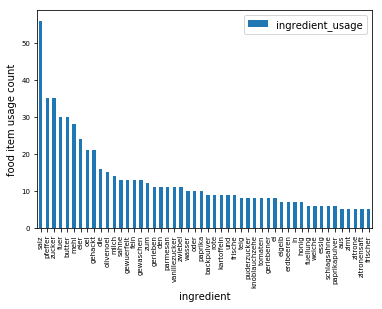

In [35]:
plt.figure(figsize=(10,10))
ingredient_frequency.plot.bar(fontsize=7)
plt.xlabel('ingredient')
plt.ylabel('food item usage count')
plt.show()